In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [234]:
data = pd.read_csv(r"C:\Users\Hp\Desktop\ICT\data set\car_age_price.csv")

In [235]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [236]:
data.shape

(112, 2)

In [237]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [238]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [239]:
data.isnull().sum()

Year     0
Price    0
dtype: int64

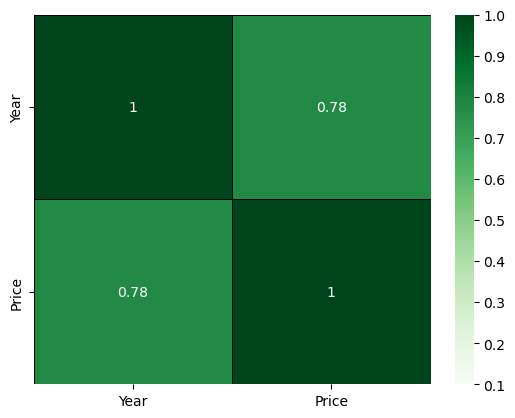

In [240]:
fig = sns.heatmap(data.corr(), cmap='Greens',vmin=0.1, vmax=1,annot=True ,linewidths=0.7, linecolor='Black')
plt.show()

In [241]:
data.corr()[['Price']]

,Price
Year,0.776302
Price,1.000000


In [242]:
data['Year'].value_counts()

2017    47
2015    22
2019    12
2018    11
2016     6
2014     6
2020     4
2013     4
Name: Year, dtype: int64

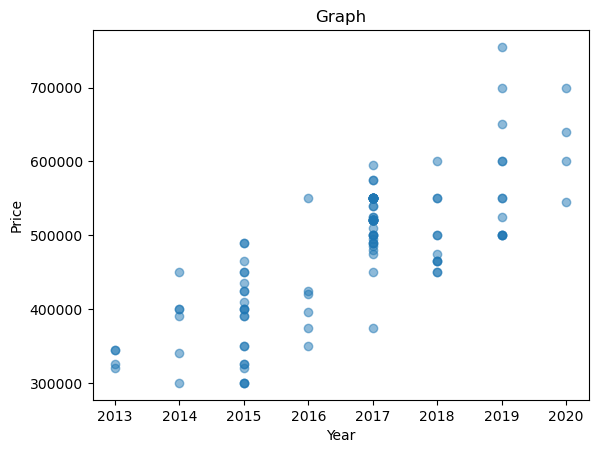

In [243]:
#Scatter plot

x = data.drop(['Price'],axis=1)
y = data['Price']

plt.scatter(x,y,alpha=0.5)
plt.title('Graph')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()



 the graph show a positive correlation 

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


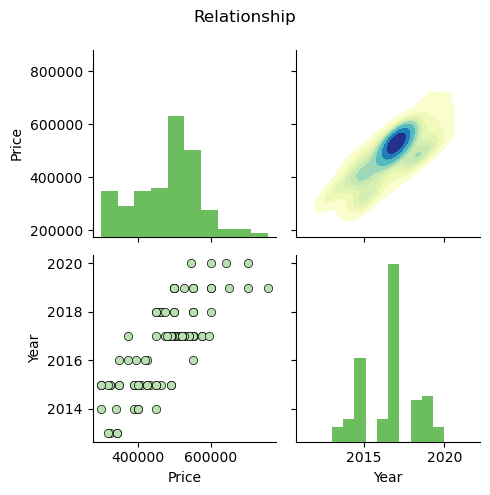

In [244]:
# relationship
g = sns.PairGrid(data[['Price','Year']])
g = g.map_upper(sns.kdeplot, cmap='YlGnBu', shade=True, shade_lowest=False)
g = g.map_diag(plt.hist, color='#6cbd5e')
g = g.map_lower(sns.scatterplot, color='#b8e0b1', edgecolor='k')

g.fig.tight_layout()
g.fig.suptitle('Relationship')
plt.subplots_adjust(top=0.9)

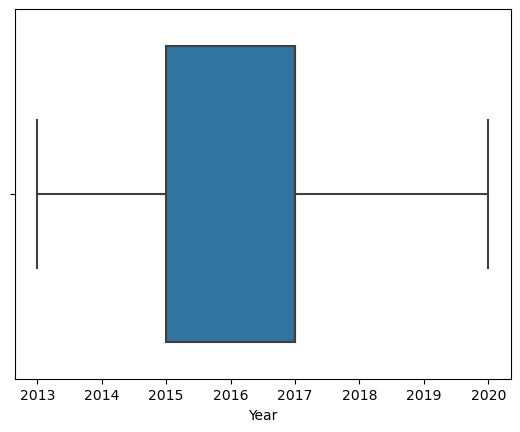

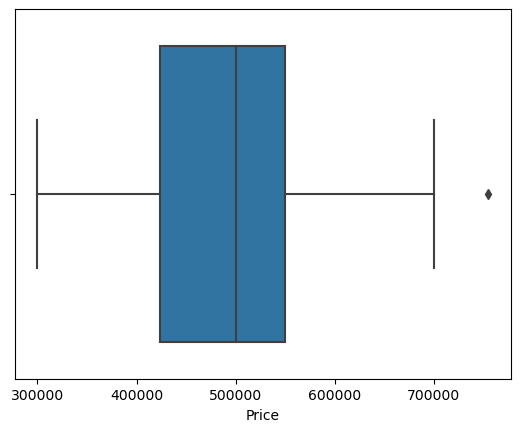

In [256]:
#box plot
for i in data:
    sns.boxplot(x=data[i])
    plt.show()

# Linear Regression

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [ ]:
lr= linear_model.LinearRegression()

In [ ]:
model=lr.fit(x_train,y_train)

In [246]:
y_pred=model.predict(x_test)

In [247]:
print('r2=',r2_score(y_test,y_pred))

r2= 0.36759313425902185


In [248]:
model.predict([[2022]])

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([743601.61594504])

In [249]:
model.score(x_test,y_test)

0.36759313425902185

# Lasso Regression

In [250]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso(alpha=1.0)

lasso.fit(x_train,y_train)

Lasso()

In [251]:
y_pred=lasso.predict(x_test)

In [252]:
y_pred

array([600774.90747294, 505558.59627394, 553166.75187345, 553166.75187345,
       553166.75187345, 410342.28507493, 505558.59627394, 553166.75187345,
       600774.90747294, 600774.90747294, 315125.97387594, 505558.59627394,
       410342.28507493, 648383.06307244, 553166.75187345, 600774.90747294,
       315125.97387594, 410342.28507493, 505558.59627394, 505558.59627394,
       505558.59627394, 505558.59627394, 505558.59627394])

In [253]:
print('r2=',r2_score(y_test,y_pred))

r2= 0.3675999284778446


In [254]:
lasso.predict([[2022]])

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


array([743599.37427144])